In [1]:
%matplotlib inline

In [2]:
import astropy.io.fits as py
import numpy as np
import matplotlib.pyplot as plt
from petitRADTRANS import Radtrans
from petitRADTRANS.poor_mans_nonequ_chem import interpol_abundances
from petitRADTRANS import nat_cst as nc

In [3]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 25

In [4]:
atmosphere = Radtrans(line_species = ['H2O_HITEMP',
                                      'CO_all_iso_HITEMP',
                                      'CH4',
                                      'CO2',
                                      'Na_allard',
                                      'K_allard'],
                      rayleigh_species = ['H2', 'He'],
                      continuum_opacities = ['H2-H2', 'H2-He'],
                      wlen_bords_micron = [0.363, 0.950])

/Users/ricardoramirez/miniconda3/envs/petitRADTRANS/lib/python3.10/site-packages/petitRADTRANS/radtrans.py:119: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  warnings.warn(f"pRT_input_data_path was set by an environment variable. In a future update, the path to "


  Read line opacities of H2O_HITEMP...
  Read line opacities of CO_all_iso_HITEMP...
  Read line opacities of CH4...
 Done.
  Read line opacities of CO2...
 Done.
  Read line opacities of Na_allard...
  Read line opacities of K_allard...

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.



In [5]:
pressures = np.logspace(-6, 2, 100)

In [6]:
atmosphere.setup_opa_structure(pressures)

In [7]:
# Planets
G               = 6.674e-11  # m3 kg-1 s-2
Jupiter_Radius  = 69911000 #m
Jupiter_Mass    = 1.898e+27 #kg

m = 3.1
r = 1.53
R_pl = 1.53*nc.r_jup

# Star Radious
r_star = 1.92  # Solar radious
star_radius = r_star*nc.r_sun


g = G*Jupiter_Mass*m/(Jupiter_Radius*Jupiter_Radius*r*r)

In [8]:
from petitRADTRANS.physics import guillot_global
gravity = g * 100
print(gravity)
P0 = 0.01

kappa_IR = 0.01
gamma = 0.4
T_int = 100.
T_equ = 2455.
temperature = guillot_global(pressures, kappa_IR, gamma, gravity, T_int, T_equ)

MMW = 2.33 * np.ones_like(temperature)

3432.1812469966494


In [9]:
metallicity = 3.00
COs  = 0.55 * np.ones_like(pressures) # log CO (0.1)  #Loz Z  -1.7
FeHs = metallicity * np.ones_like(pressures)


mass_fraction = interpol_abundances(COs, \
            FeHs, \
            temperature, \
            pressures)
print(mass_fraction.keys())


#mass_fraction['Fe'] = 0.0014 *(10**(metallicity)) * np.ones_like(temperature)
#mass_fraction['Ca'] = 0.0001 *(10**(metallicity)) * np.ones_like(temperature)
#mass_fraction['V'] = 0.00001 *(10**(metallicity)) * np.ones_like(temperature)

dict_keys(['H2', 'He', 'CO', 'H2O', 'HCN', 'C2H2,acetylene', 'CH4', 'PH3', 'CO2', 'NH3', 'H2S', 'VO', 'TiO', 'Na', 'K', 'SiO', 'e-', 'H-', 'H', 'FeH', 'MMW', 'nabla_ad'])


In [10]:
atmosphere.calc_transm(temperature, mass_fraction, gravity, MMW, R_pl=R_pl, P0_bar=P0)

6991100000.0


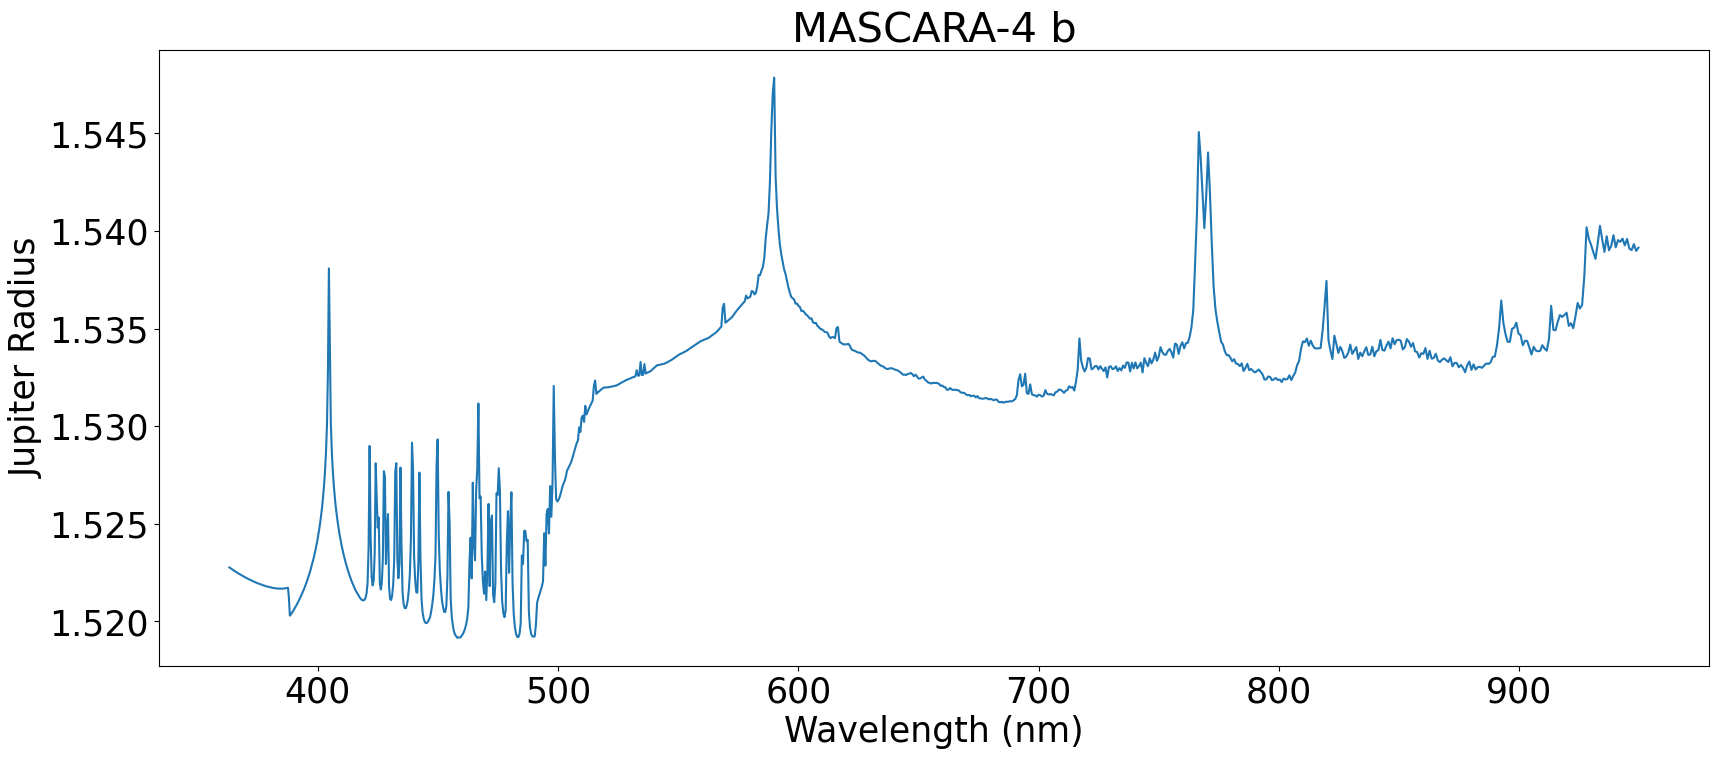

In [13]:
print(nc.r_jup_mean) # all in meters.
temp = atmosphere.transm_rad/nc.r_jup
plt.plot(nc.c/atmosphere.freq/1e-7, temp)
#plt.xlim(500,700)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Jupiter Radius')
plt.title("MASCARA-4 b")
# Save the figure
plt.savefig('MASCARA-4_b_plot.png')

In [14]:
np.save("MASCARA-4b", (nc.c/atmosphere.freq/1e-7, temp))